#### Name-Anish Kumar Barik
#### Redg.No. - 24MDT0170


In [1]:
#Question No: 01
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
data=pd.read_csv("Book1.csv")
from sklearn import preprocessing
data

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus
0,13300000,7420,4,2,3,2,furnished
1,12250000,8960,4,4,4,3,furnished
2,12250000,9960,3,2,2,2,semi-furnished
3,12215000,7500,4,2,2,3,furnished
4,11410000,7420,4,1,2,2,furnished
...,...,...,...,...,...,...,...
244,4550000,5320,3,1,2,0,semi-furnished
245,4550000,5360,3,1,2,2,unfurnished
246,4550000,3520,3,1,1,0,semi-furnished
247,4550000,8400,4,1,4,3,unfurnished


In [3]:
data=data.drop(["furnishingstatus"],axis=1)
data


,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
244,4550000,5320,3,1,2,0
245,4550000,5360,3,1,2,2
246,4550000,3520,3,1,1,0
247,4550000,8400,4,1,4,3


In [5]:
MM=preprocessing.MinMaxScaler()
x=MM.fit_transform(data)
print(x)


[[1.00000000e+00 3.56776557e-01 5.00000000e-01 3.33333333e-01
  6.66666667e-01 6.66666667e-01]
 [8.80095923e-01 4.69597070e-01 5.00000000e-01 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [8.80095923e-01 5.42857143e-01 2.50000000e-01 3.33333333e-01
  3.33333333e-01 6.66666667e-01]
 ...
 [7.99360512e-04 7.10622711e-02 2.50000000e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.99360512e-04 4.28571429e-01 5.00000000e-01 0.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.13553114e-01 0.00000000e+00 3.33333333e-01
  0.00000000e+00 0.00000000e+00]]


In [7]:
Y=x[:,0]
X=x[:,1:]


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x[:,1:],x[:,0],test_size=0.2,random_state=0)

In [13]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
model = DecisionTreeRegressor()
model.fit(X_train, y_train)


DecisionTreeRegressor()

In [15]:
predictions1 = model.predict(X_test)
print(predictions1)
print("MSE of Decision Tree Model : ",mean_squared_error(y_test,model.predict(X_test)))

[0.25659472 0.16067146 0.18864908 0.00879297 0.24860112 0.3764988
 0.24060751 0.07673861 0.05595524 0.18465228 0.28856914 0.01278977
 0.44764189 0.44044764 0.14468425 0.04156675 0.23820943 0.19264588
 0.27258193 0.13669065 0.16067146 0.44764189 0.16067146 0.64028777
 0.30189182 0.0647482  0.08073541 0.17226219 0.36051159 0.52038369
 0.3804956  0.0567546  0.00079936 0.08073541 0.17226219 0.64028777
 0.16866507 0.60031974 0.52038369 0.18465228 0.01278977 0.24860112
 0.12070344 0.10071942 0.33253397 0.16067146 0.0647482  0.2166267
 0.00479616 0.04076739]
MSE of Decision Tree Model :  0.03534087127668858


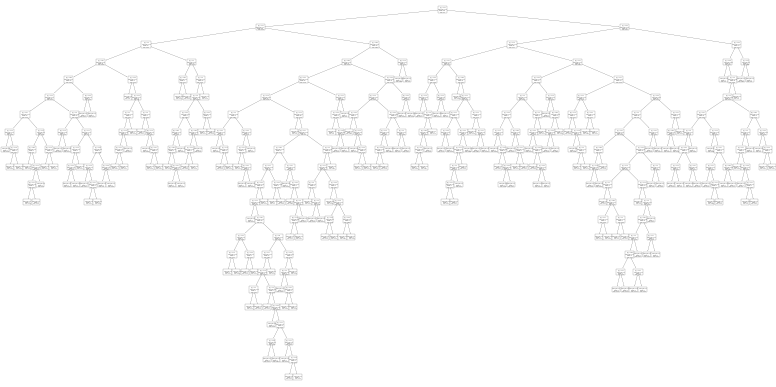

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(100,50), dpi=10)
plot_tree(model)
plt.show()


In [19]:
from sklearn.ensemble import GradientBoostingRegressor
model1=GradientBoostingRegressor(n_estimators = 100,learning_rate=0.01, max_depth=3, random_state=42)

In [21]:
model1.fit(X_train, y_train)
predictions2=model1.predict(X_test)
predictions2


array([0.16470418, 0.1291082 , 0.22779955, 0.12523543, 0.17456892,
       0.24352225, 0.22779955, 0.13479262, 0.1238369 , 0.20009837,
       0.17275938, 0.1185529 , 0.24352225, 0.17275938, 0.18082663,
       0.15039984, 0.21559469, 0.216273  , 0.30894247, 0.23821676,
       0.13117836, 0.24352225, 0.22779955, 0.37652436, 0.26836096,
       0.11765907, 0.34250187, 0.21559469, 0.27312022, 0.26836096,
       0.1349201 , 0.22153762, 0.11626055, 0.17275938, 0.21559469,
       0.34671827, 0.17275938, 0.29061291, 0.26836096, 0.20009837,
       0.11765907, 0.17456892, 0.18082663, 0.1349201 , 0.18255932,
       0.17275938, 0.11765907, 0.1238369 , 0.15829596, 0.17275938])

In [35]:
print("MSE of Gradient Boosting Model : ",mean_squared_error(y_test,model1.predict(X_test)))

MSE of Gradient Boosting Model :  0.017876601059993457


In [41]:
#Hyperparameter Tuning for Gradient Boosting Regression using Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
param_grid1 = {
'n_estimators':[100,150,200,300,250,350,450,400,500,1000],'learning_rate':[.01,.02,.05,.5]
}
grid_search = GridSearchCV(estimator=model1, param_grid=param_grid1, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
accuracy = mean_squared_error(y_test, Y_pred)
print("Best Parameters:", best_params)
print("Best Cross-validation Accuracy:", grid_search.best_score_)
print("Test Accuracy:", accuracy)


Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200}
Best Cross-validation Accuracy: 0.19768203053001338
Test Accuracy: 0.016826280135106765


In [43]:
#Question No: 2
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
data1 = pd.read_csv('liver_patient.csv')
data1.drop('Gender', axis=1, inplace=True)
data1


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [45]:
scaler = preprocessing.MinMaxScaler()
x1 = scaler.fit_transform(data1)
X1 = x1[:, 0:9]
Y1 = x1[:, 9]
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state=42)

In [47]:
model2 = DecisionTreeClassifier()
model2.fit(X_train1, Y_train1)
predictions3=model2.predict(X_test1)
print(predictions3)
print("Decision Tree Classifier Accuracy : ",accuracy_score(Y_test1, predictions3))

[0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.]
Decision Tree Classifier Accuracy :  0.7094017094017094


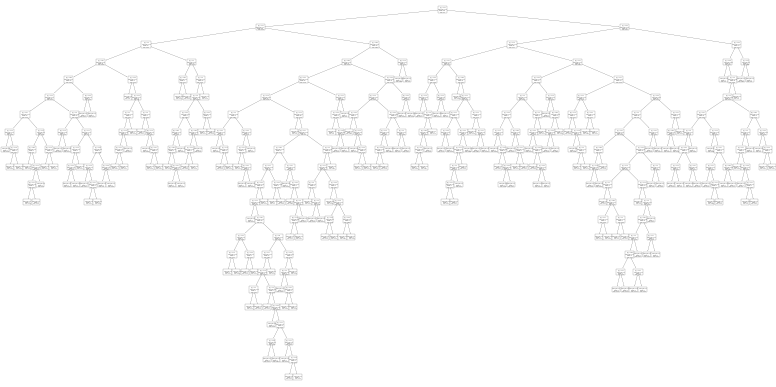

In [49]:
plt.figure(figsize=(100,50), dpi=10)
plot_tree(model)
plt.show()


In [51]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
model3=GradientBoostingClassifier(n_estimators = 100,learning_rate=0.01, max_depth=3, random_state=42)
model3.fit(X_train1, Y_train1)
predictions4=model3.predict(X_test1)
print(predictions4)
print("Gradient Boosting Classifier Accuracy : ",accuracy_score(Y_test1, predictions4))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Gradient Boosting Classifier Accuracy :  0.7350427350427351


In [55]:
#Hyperparameter Tuning for Gradient Boosting Classifier using Grid Search
param_grid2 = {
'n_estimators':[100,150,200,300,250,350,450,400,500,1000],'learning_rate':[.01,.02,.05,.5]
}
grid_search = GridSearchCV(estimator=model3, param_grid=param_grid2, cv=5, scoring='accuracy')
grid_search.fit(X_train1, Y_train1)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
Y_pred1 = best_model.predict(X_test1)
accuracy = accuracy_score(Y_test1, Y_pred1)
print("Best Parameters:", best_params)
print("Best Cross-validation Accuracy:", grid_search.best_score_)
print("Test Accuracy:", accuracy)


Best Parameters: {'learning_rate': 0.01, 'n_estimators': 100}
Best Cross-validation Accuracy: 0.7059940517044155
Test Accuracy: 0.7350427350427351


In [57]:
#Question No: 3
#Define alpha values for tuning
alpha_values=np.logspace(-2,4,100) #10 values from 10^-2 to 10^4
print(alpha_values)

[1.00000000e-02 1.14975700e-02 1.32194115e-02 1.51991108e-02
 1.74752840e-02 2.00923300e-02 2.31012970e-02 2.65608778e-02
 3.05385551e-02 3.51119173e-02 4.03701726e-02 4.64158883e-02
 5.33669923e-02 6.13590727e-02 7.05480231e-02 8.11130831e-02
 9.32603347e-02 1.07226722e-01 1.23284674e-01 1.41747416e-01
 1.62975083e-01 1.87381742e-01 2.15443469e-01 2.47707636e-01
 2.84803587e-01 3.27454916e-01 3.76493581e-01 4.32876128e-01
 4.97702356e-01 5.72236766e-01 6.57933225e-01 7.56463328e-01
 8.69749003e-01 1.00000000e+00 1.14975700e+00 1.32194115e+00
 1.51991108e+00 1.74752840e+00 2.00923300e+00 2.31012970e+00
 2.65608778e+00 3.05385551e+00 3.51119173e+00 4.03701726e+00
 4.64158883e+00 5.33669923e+00 6.13590727e+00 7.05480231e+00
 8.11130831e+00 9.32603347e+00 1.07226722e+01 1.23284674e+01
 1.41747416e+01 1.62975083e+01 1.87381742e+01 2.15443469e+01
 2.47707636e+01 2.84803587e+01 3.27454916e+01 3.76493581e+01
 4.32876128e+01 4.97702356e+01 5.72236766e+01 6.57933225e+01
 7.56463328e+01 8.697490

In [59]:
#Ridge Regression with RidgeCV
from sklearn.linear_model import RidgeCV
ridge_cv=RidgeCV(alphas=alpha_values, store_cv_values=True)
ridge_cv.fit(X_train,y_train)
ridge_pred=ridge_cv.predict(X_test)
print("Best Ridge Alpha : ", ridge_cv.alpha_)
print("Ridge Regression MSE : ", mean_squared_error(y_test, ridge_pred) )
print("Ridge Coefficients : ", ridge_cv.coef_)


Best Ridge Alpha :  0.49770235643321115
Ridge Regression MSE :  0.019544354076967984
Ridge Coefficients :  [0.2916599  0.0894537  0.30197724 0.13122731 0.14923577]


In [61]:
#Lasso Regression with LassoCV
from sklearn.linear_model import LassoCV
lasso_cv=LassoCV(alphas=alpha_values, cv=5, random_state=0)
lasso_cv.fit(X_train,y_train)
lasso_pred=lasso_cv.predict(X_test)
print("Best Lasso Alpha : ", lasso_cv.alpha_)
print("Lasso Regression MSE : ", mean_squared_error(y_test, lasso_pred) )
print("Lasso Coefficients : ", lasso_cv.coef_)


Best Lasso Alpha :  0.01
Lasso Regression MSE :  0.01991781625293486
Lasso Coefficients :  [0.         0.         0.13504156 0.07345709 0.07836195]
